In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dangjin_fcst = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/당진/dangjin_fcst_data.csv')
dangjin_fcst

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


In [5]:
#예보 시간 컬럼의 데이터 타입을 datetime으로 변경합니다.
dangjin_fcst['Forecast_time'] = pd.to_datetime(dangjin_fcst['Forecast time'])


In [6]:
# 기상청에서는 하루 3시간 간격으로 8회 예보합니다.
# 여기서는 14시 예보만을 사용하였습니다.
fcst_14 = dangjin_fcst[dangjin_fcst['Forecast_time'].dt.hour==14]

In [7]:
#다음 날의 기상 예보가 필요하여 예보시간 기준 10시간 후(00:00)부터 33시간 후(23:00) 데이터만 사용합니다.

fcst_14 = fcst_14[(fcst_14['forecast']>=10)&(fcst_14['forecast']<=33)]

In [8]:
#예보 시점에 focast를 더하여 예보 시각을 구합니다.

def to_date(x):
    return pd.DateOffset(hours=x)

fcst_14['Forecast_time'] = fcst_14['Forecast_time'] + fcst_14['forecast'].map(to_date)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [9]:
fcst_14 = fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]
fcst_14

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
22,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
23,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
24,2018-03-02 06:00:00,-5.0,60.0,4.3,344.0,1.0
25,2018-03-02 09:00:00,-2.0,55.0,2.0,345.0,1.0
26,2018-03-02 12:00:00,1.0,45.0,0.8,256.0,1.0
...,...,...,...,...,...,...
162085,2021-03-01 09:00:00,8.0,90.0,3.9,64.0,4.0
162086,2021-03-01 12:00:00,10.0,90.0,4.8,7.0,4.0
162087,2021-03-01 15:00:00,10.0,85.0,6.6,11.0,4.0
162088,2021-03-01 18:00:00,7.0,85.0,6.5,34.0,4.0


In [10]:
#태양광 발전량 예측은 1시간 간격으로 해야하나 예보는 3시간 간격으로 나옵니다.
# knn & 선형회귀
fcst_14_ = pd.DataFrame()
fcst_14_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='H')

In [11]:
fcst_14_ = pd.merge(fcst_14_, fcst_14, on='Forecast_time', how='outer')

In [12]:
fcst_14_

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
1,2018-03-02 01:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-02 02:00:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
4,2018-03-02 04:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,NaN,NaN,NaN,NaN,NaN
26300,2021-03-01 20:00:00,NaN,NaN,NaN,NaN,NaN
26301,2021-03-01 21:00:00,5.0,85.0,5.9,27.0,4.0
26302,2021-03-01 22:00:00,NaN,NaN,NaN,NaN,NaN


In [13]:
#보간?
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

inter_fcst_14 = fcst_14_.interpolate() #method="polynomial", order=2
inter_fcst_14


inter_fcst_14.to_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/test_dangjin_gawon.csv', index=False)


In [14]:
inter_fcst_14

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,55.000000,6.7,336.000000,1.0
1,2018-03-02 01:00:00,-2.666667,55.000000,6.3,337.000000,1.0
2,2018-03-02 02:00:00,-3.333333,55.000000,5.9,338.000000,1.0
3,2018-03-02 03:00:00,-4.000000,55.000000,5.5,339.000000,1.0
4,2018-03-02 04:00:00,-4.333333,56.666667,5.1,340.666667,1.0
...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,6.333333,85.000000,6.3,31.666667,4.0
26300,2021-03-01 20:00:00,5.666667,85.000000,6.1,29.333333,4.0
26301,2021-03-01 21:00:00,5.000000,85.000000,5.9,27.000000,4.0
26302,2021-03-01 22:00:00,5.000000,85.000000,5.9,27.000000,4.0


In [15]:
dangjin_obs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/당진/dangjin_obs_data.csv')
obs = dangjin_obs.iloc[:,2:]
obs.rename(columns = {'일시' : 'Time', '기온(°C)':'Temperature','풍속(m/s)':'WindSpeed','풍향(16방위)':'WindDirection','전운량(10분위)':'Cloud','습도(%)':'Humidity'}, inplace = True)
#fcst_14_.rename(columns={'Forecast_time':'Time'})
obs

obs['Time'] = pd.to_datetime(obs['Time'])


In [16]:
dangjin_obs['지점'].value_counts()

129    25626
Name: 지점, dtype: int64

In [17]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25626 entries, 0 to 25625
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           25626 non-null  datetime64[ns]
 1   Temperature    25589 non-null  float64       
 2   WindSpeed      25590 non-null  float64       
 3   WindDirection  25590 non-null  float64       
 4   Humidity       25591 non-null  float64       
 5   Cloud          21656 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.2 MB


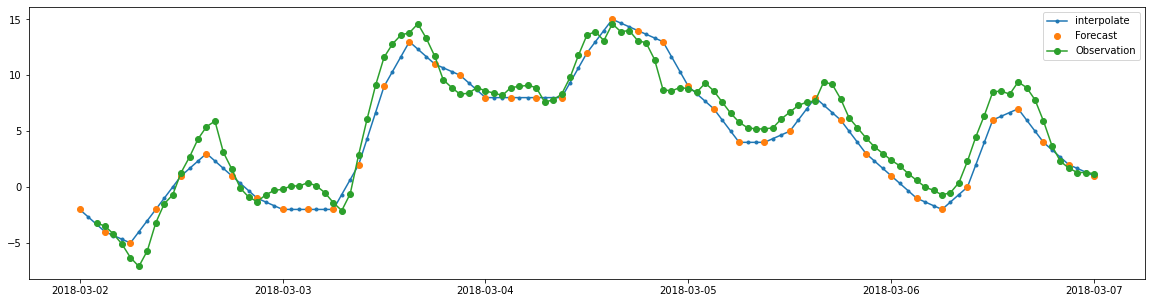

In [18]:
plt.figure(figsize=(20,5))
days = 5
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'Temperature'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'Temperature'], 'o')
plt.plot(obs.loc[26:24*(days+1), 'Time'], obs.loc[26:24*(days+1), 'Temperature'], '-o')
plt.legend(['interpolate','Forecast','Observation'])

#예보랑 관측도 다른데 어떻게 회귀분석을 할수있지..??

In [19]:
# plt.figure(figsize=(20,5))
# days = 5

# value_itp= fcst_14_.interpolate(method='values')
# plt.plot(value_itp.Forecast_time[:200], value_itp.Temperature[:200])
# plt.plot(fcst_14_.Forecast_time[:200], fcst_14_.Temperature[:200],'-o')
# plt.plot(obs.loc[26:24*(days+1), 'Time'], obs.loc[26:24*(days+1), 'Temperature'], '-o')


In [20]:
#cloud 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

obs['Cloud']=scaler.fit_transform(obs[['Cloud']])
fcst_14_['Cloud']=scaler.fit_transform(fcst_14_[['Cloud']])
#fcst_14_.Cloud.value_counts
fcst_14_['Cloud'].value_counts()

0.000000    3097
0.666667    2366
1.000000    2300
0.333333    1005
Name: Cloud, dtype: int64

In [21]:
df=fcst_14_.iloc[:,1:]
df_nona = fcst_14_.dropna(axis=0)
df_na=df[df.isna().all(axis=1)]
df_nona #20824

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,0.0
3,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,0.0
6,2018-03-02 06:00:00,-5.0,60.0,4.3,344.0,0.0
9,2018-03-02 09:00:00,-2.0,55.0,2.0,345.0,0.0
12,2018-03-02 12:00:00,1.0,45.0,0.8,256.0,0.0
...,...,...,...,...,...,...
26289,2021-03-01 09:00:00,8.0,90.0,3.9,64.0,1.0
26292,2021-03-01 12:00:00,10.0,90.0,4.8,7.0,1.0
26295,2021-03-01 15:00:00,10.0,85.0,6.6,11.0,1.0
26298,2021-03-01 18:00:00,7.0,85.0,6.5,34.0,1.0


In [22]:
idx = df_na.index
df_na=fcst_14_.iloc[idx]
df_na

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
1,2018-03-02 01:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-02 02:00:00,NaN,NaN,NaN,NaN,NaN
4,2018-03-02 04:00:00,NaN,NaN,NaN,NaN,NaN
5,2018-03-02 05:00:00,NaN,NaN,NaN,NaN,NaN
7,2018-03-02 07:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
26297,2021-03-01 17:00:00,NaN,NaN,NaN,NaN,NaN
26299,2021-03-01 19:00:00,NaN,NaN,NaN,NaN,NaN
26300,2021-03-01 20:00:00,NaN,NaN,NaN,NaN,NaN
26302,2021-03-01 22:00:00,NaN,NaN,NaN,NaN,NaN


In [23]:
import datetime as dt
import time


df_nona['Date'] = pd.to_datetime(df_nona['Forecast_time'])
df_nona['Date']=df_nona['Date'].map(dt.datetime.toordinal)


df_na['Date'] = pd.to_datetime(df_na['Forecast_time'])
df_na['Date']=df_na['Date'].map(dt.datetime.toordinal)


obs['Date'] = pd.to_datetime(obs['Time'])
obs['Date']=obs['Date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [24]:
pd.to_datetime(dangjin_fcst['Forecast time'])

0        2018-03-01 11:00:00
1        2018-03-01 11:00:00
2        2018-03-01 11:00:00
3        2018-03-01 11:00:00
4        2018-03-01 11:00:00
                 ...        
162203   2021-03-01 08:00:00
162204   2021-03-01 08:00:00
162205   2021-03-01 08:00:00
162206   2021-03-01 08:00:00
162207   2021-03-01 08:00:00
Name: Forecast time, Length: 162208, dtype: datetime64[ns]

In [25]:
#관측에서 결측있는 행 빼버리기
obs_nona=obs.dropna(axis=0)
obs_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21618 entries, 3324 to 25625
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           21618 non-null  datetime64[ns]
 1   Temperature    21618 non-null  float64       
 2   WindSpeed      21618 non-null  float64       
 3   WindDirection  21618 non-null  float64       
 4   Humidity       21618 non-null  float64       
 5   Cloud          21618 non-null  float64       
 6   Date           21618 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.3 MB


In [26]:
obs_nona.rename(columns={'Time':'Forecast_time'},inplace = True )
obs_nona['Forecast_time']=pd.to_datetime(obs_nona['Forecast_time'])
def time(df):
  df['year']=df.Forecast_time.dt.strftime('%Y') 
  df['month']=df.Forecast_time.dt.strftime('%m') 
  df['day']=df.Forecast_time.dt.strftime('%d') 
  df['hour']=df.Forecast_time.dt.strftime('%H') 

time(df_nona)
time(obs_nona)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [27]:
# obs.info()
# obs = obs.interpolate(method="polynomial", order=2) #관측 결측치 메꾸기??
# obs.info()

In [28]:
obs_nona[['Date']]
df_nona.Date

0        736755
3        736755
6        736755
9        736755
12       736755
          ...  
26289    737850
26292    737850
26295    737850
26298    737850
26301    737850
Name: Date, Length: 8768, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x = obs_nona[['Humidity', 'WindSpeed', 'WindDirection','Cloud','year','month','day','hour']]
y = obs_nona[['Temperature']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [30]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

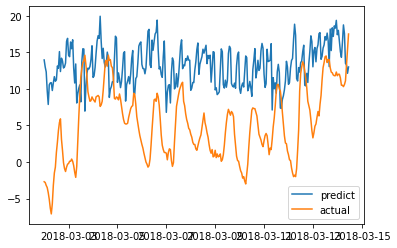

In [31]:
m=df_nona[['Humidity', 'WindSpeed', 'WindDirection','Cloud','year','month','day','hour']] #date int로 학습
predict = mlr.predict(m)
plt.plot(fcst_14_.Forecast_time[0:300],predict[0:300])
plt.plot(obs.Time[24:324],obs.Temperature[24:324])
plt.legend(['predict','actual'])
#obs[['Date']]

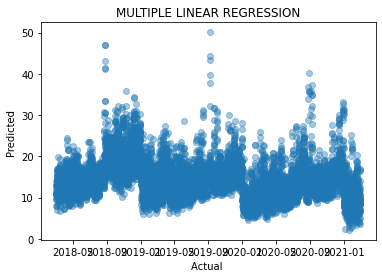

In [32]:
plt.scatter(df_nona.Forecast_time, predict, alpha=0.4)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [33]:
Temperature=df_nona.iloc[:,1]
Temperature

Humidity=df_nona.iloc[:,2]


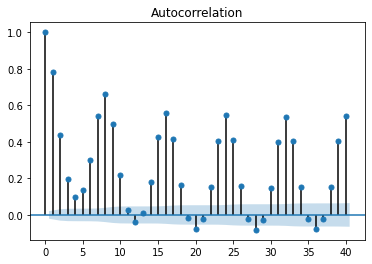

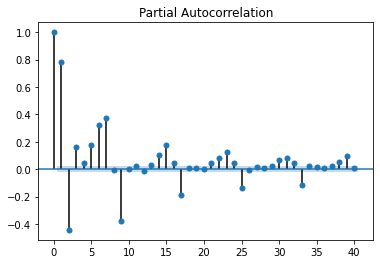

In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Humidity)
plot_pacf(Humidity)
plt.show()

In [35]:
#시계열 회귀에서 쓰이는 ARIMA -> 결정론적 모델 부적합 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Humidity, order=(1,1,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Humidity   No. Observations:                 8767
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -33567.129
Method:                       css-mle   S.D. of innovations             11.132
Date:                Tue, 20 Apr 2021   AIC                          67140.258
Time:                        04:20:31   BIC                          67161.494
Sample:                             1   HQIC                         67147.493
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0034      0.166      0.021      0.984      -0.323       0.330
ar.L1.D.Humidity     0.2859      0.010     27.935      0.000       0.266       0.306
                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
